The purpose is to try to create simple neural network by hand

## Getting MNIST data

In [25]:
#gathering data for training:

#importing modules:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

print('Fetching and loading MNIST data')
mnist = fetch_mldata('MNIST original')
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(X_train)
print(y_train)

Fetching and loading MNIST data
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[ 0.  0.  0. ...,  9.  9.  9.]


Example of data


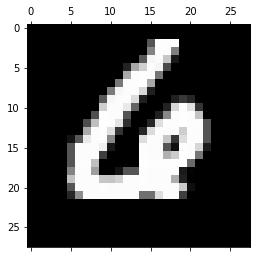

In [40]:
new_arr = np.array(X_train[40000])
new_arr.resize((28, 28))
print("Example of data")
plt.matshow(new_arr, cmap=plt.cm.gray)
plt.show()

In [49]:
print(np.array(X_train).transpose())

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


## Neural Network algorythm from Sklearn:

In [12]:
def run_sklearn_version():
    # mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
    #                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,100), #The ith element represents the number of neurons in the ith hidden layer.
        #max_iter=10,
        alpha=1e-4, #?
        solver='sgd', #‘sgd’ refers to stochastic gradient descent
        verbose=False, #whether to print progress messages to stdout.
        tol=1e-4, #when the loss or score is not improving by at least tol for two consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops
        random_state=1, #seed used by the random number generator
        learning_rate_init=.1) #controls the step-size in updating the weights

    mlp.fit(X_train, y_train)
    print("Training set score: %f" % mlp.score(X_train, y_train))
    print("Test set score: %f" % mlp.score(X_test, y_test))
run_sklearn_version()

Training set score: 0.997333
Test set score: 0.976000


## Neural Network based on Coursera:
Assuming we use 2 hidden layers, 100 neurons each

Not done yet. Few problems found:
* A3 is filled with "1"s for some reason

In [76]:
import math
from coursera_utils import sigmoid, sigmoid_backward, relu, relu_backward, linear_activation_backward

def run_coursera_version():
    m = 60000 #number of training examples
    Y = y_train.transpose() # correct labels for training examples
    
    # FORWARD PROPAGATION
    
    # Preparing data
    X = np.array(X_train).transpose()
    # Random weights
    # Layer 1: 784 features connected to 100 neurons
    W1 = np.random.rand(100, 784)
    # Biases: one for each neuron
    B1 = np.zeros((100, 1))
    # Layer 2: 100 neruons connected to 100 neurons
    W2 = np.random.rand(100, 100)
    # Biases: one for each neuron
    B2 = np.zeros((100, 1))
    # Layer 3: output layer. 100 neurons connected to 10 outputs
    W3 = np.random.rand(10, 100)
    # Biases
    B3 = np.zeros((10, 1))
    
    # Calculating activation values:
    Z1 = np.dot(W1, X) + B1
    A1, cache1 = relu(Z1)
    assert(A1.shape == (100, m)) # m examples, 100 activation values each
    Z2 = np.dot(W2, A1) + B2
    A2, cache2 = relu(Z2)
    Z3 = np.dot(W3, A2) + B3
    A3, cache3 = sigmoid(Z3) #Y_predicted
    
    # Using following loss function:
    # J = -[y(i)log(a(i))+(1-y(i))*log(1-a(i))]
    # where (i) means: value for i-th training example
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(A3)) + np.multiply(1 - Y, np.log(1 - A3)))
    cost = np.squeeze(cost) # matrix to number
    
    # BACKPROPAGATION
    
    Y = Y.reshape(1, m) # ensure it's shape is (1, m)
    dA3 = - (np.divide(Y, A3) - np.divide(1 - Y, 1 - A3)) # derivative of cost with respect to A3
    
    # Give A3 for linear_activation_backward for sigmoid function. It will give us dA2, dW3, db3
    #assert(dA3.shape() == Z3.shape())
    print("A1")
    print(A1)
    print("A2")
    print(A2)
    print("A3")
    print(A3)
    print("dA3")
    print(dA3)
    print(Z3.shape())
    dA2, dW3, dB3 = linear_activation_backward(dA3, ((A2, W3, B3), (Z3)), activation="sigmoid")
    # Give A2 for linear_activation_backward for relu function. It will give us dA1, dW2, db2
    dA1, dW2, dB2 = linear_activation_backward(dA3, ((A1, W2, B2), (Z2)), activation="relu")
    # Give A1 for linear_activation_backward for relu function. It will give us dX (not necessary), dW1, db1
    dX, dW1, dB1 = linear_activation_backward(dA3, ((X, W1, B1), (Z1)), activation="relu")
    
    # TODO: updating weights and biases
    W3 = W3 - learning_rate * dW3
    B3 = B3 - learning_rate *dB3
    
    W2 = W2 - learning_rate * dW2
    B2 = B2 - learning_rate *dB2
    
    W1 = W1 - learning_rate * dW1
    B1 = B1 - learning_rate *dB1
run_coursera_version();
        

A1
[[ 59.61331549  67.30352542  68.69043905 ...,  39.36205165  35.85158966
   31.51230247]
 [ 63.38708995  73.71598809  76.06052321 ...,  44.1564731   36.66524631
   31.29901434]
 [ 60.30539194  71.12672836  72.71477102 ...,  42.92809835  35.62454804
   30.8801253 ]
 ..., 
 [ 57.6341929   66.20797694  65.24815441 ...,  40.78845681  36.94886324
   32.94799559]
 [ 63.54128654  71.59764508  75.08148336 ...,  43.12587876  37.20624601
   33.08009127]
 [ 66.12415827  74.80821186  76.51130173 ...,  41.47748558  39.35659756
   36.33857941]]
A2
[[ 3182.29394588  3633.2934314   3744.29927799 ...,  2143.51145379
   1878.70637116  1650.37125397]
 [ 3362.14892341  3841.95029089  3940.09699171 ...,  2251.90858589
   1981.17932137  1743.10525311]
 [ 3162.79002574  3612.446777    3704.56454709 ...,  2122.6143218
   1857.57644603  1636.86471037]
 ..., 
 [ 2809.17512139  3210.506501    3307.74429352 ...,  1888.90686066
   1659.49806977  1458.49396531]
 [ 3160.77484011  3612.8494348   3713.98807229 ..., 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: RuntimeWarning: invalid value encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: RuntimeWarning: invalid value encountered in true_divide


TypeError: 'tuple' object is not callable